In [2]:
import imgaug.augmenters as iaa
import numpy as np

environments = {'normal': iaa.Sequential([iaa.Noop()]),
                'dark' : iaa.Sequential([
                                        # iaa.BlendAlpha(0.5, foreground=iaa.Add(100), background=iaa.Multiply(0.2), seed=31),
                                        iaa.MultiplyAndAddToBrightness(mul=0.4, add=-15, seed=1991)]),
                'fog'  : iaa.Sequential([iaa.CloudLayer(intensity_mean=225, intensity_freq_exponent=-2, intensity_coarse_scale=2, alpha_min=1.0,
                                        alpha_multiplier=0.9, alpha_size_px_max=10, alpha_freq_exponent=-2, sparsity=0.9, density_multiplier=0.5, seed=35)]),
                'rain' : iaa.Sequential([iaa.Rain(drop_size=(0.05, 0.1), speed=(0.04, 0.06), seed=38),
                                        iaa.Rain(drop_size=(0.05, 0.1), speed=(0.04, 0.06), seed=35),
                                        iaa.Rain(drop_size=(0.1, 0.2), speed=(0.04, 0.06), seed=73),
                                        iaa.Rain(drop_size=(0.1, 0.2), speed=(0.04, 0.06), seed=93),
                                        iaa.Rain(drop_size=(0.05, 0.2), speed=(0.04, 0.06), seed=95)]),
                'snow' : iaa.Sequential([iaa.Snowflakes(flake_size=(0.5, 0.8), speed=(0.007, 0.03), seed=38),
                                        iaa.Snowflakes(flake_size=(0.5, 0.8), speed=(0.007, 0.03), seed=35),
                                        iaa.Snowflakes(flake_size=(0.6, 0.9), speed=(0.007, 0.03), seed=74),
                                        iaa.Snowflakes(flake_size=(0.6, 0.9), speed=(0.007, 0.03), seed=94),
                                        iaa.Snowflakes(flake_size=(0.5, 0.9), speed=(0.007, 0.03), seed=96)]),
                'fog_rain' : iaa.Sequential([iaa.CloudLayer(intensity_mean=225, intensity_freq_exponent=-2, intensity_coarse_scale=2, alpha_min=1.0,
                                            alpha_multiplier=0.9, alpha_size_px_max=10, alpha_freq_exponent=-2, sparsity=0.9, density_multiplier=0.5, seed=35),
                                            iaa.Rain(drop_size=(0.05, 0.2), speed=(0.04, 0.06), seed=35),
                                            iaa.Rain(drop_size=(0.05, 0.2), speed=(0.04, 0.06), seed=36)]),
                'fog_snow' : iaa.Sequential([iaa.CloudLayer(intensity_mean=225, intensity_freq_exponent=-2, intensity_coarse_scale=2, alpha_min=1.0,
                                            alpha_multiplier=0.9, alpha_size_px_max=10, alpha_freq_exponent=-2, sparsity=0.9, density_multiplier=0.5, seed=35),
                                            iaa.Snowflakes(flake_size=(0.5, 0.9), speed=(0.007, 0.03), seed=35),
                                            iaa.Snowflakes(flake_size=(0.5, 0.9), speed=(0.007, 0.03), seed=36)]),
                'rain_snow' : iaa.Sequential([iaa.Snowflakes(flake_size=(0.5, 0.8), speed=(0.007, 0.03), seed=35),
                                            iaa.Rain(drop_size=(0.05, 0.1), speed=(0.04, 0.06), seed=35),
                                            iaa.Rain(drop_size=(0.1, 0.2), speed=(0.04, 0.06), seed=92),
                                            iaa.Rain(drop_size=(0.05, 0.2), speed=(0.04, 0.06), seed=91),
                                            iaa.Snowflakes(flake_size=(0.6, 0.9), speed=(0.007, 0.03), seed=74)]),
                'light': iaa.Sequential([iaa.MultiplyAndAddToBrightness(mul=1.6, add=(0, 30), seed=1992)]),
                'wind' : iaa.Sequential([iaa.MotionBlur(15, seed=17)])
                }

weathers = list(environments)

# Figure 1

overview of proposed framework

generate some imgs inside

In [39]:
import numpy as np
from torchvision import transforms
from PIL import Image
import os
import torch
import imgaug as ia


def load(path):
    t = transforms.ToTensor()
    img = Image.open(path).convert('RGB')   
    img = np.array(img)

    weather = np.random.choice(weathers)
    img_aug = environments[weather](image=img)
    img_aug = Image.fromarray(img_aug)
    img_aug.save('aug.jpg')

    img = t(img)
    return img

def save_tensor(img, name='scene', dir='figure'):
    t = transforms.ToPILImage()
    img = t(img)
    img.save(os.path.join(os.getcwd(), dir, name+'.png'))

def get_imgs(path = "University-Release/train/drone/0976/image-54.jpeg", dir='figure', channel=0, weather='snow'):
    img = Image.open(path).convert('RGB') 
    img.save(os.path.join(os.getcwd(), dir, 'scene.png')) 

    img = np.array(img)
    #weather = np.random.choice(weathers)
    img_aug = environments[weather](image=img)
    img_aug = Image.fromarray(img_aug)
    img_aug.save(os.path.join(os.getcwd(), dir, 'scene_{}.png'.format(weather)))

    # img_aug:Image -> tensor
    t = transforms.ToTensor()
    img = t(img_aug)

    fre = torch.fft.fft2(img[0])
    shifted = torch.fft.fftshift(fre)

    amp = torch.abs(shifted)
    pha = torch.angle(shifted)

    n_amp = amp.numpy()
    n_pha = pha.numpy()

    v_amp = 20 *  np.log(n_amp)
    #v_amp = ((v_amp / v_amp.max()) * 255).astype(np.uint8)
    v_amp = v_amp.astype(np.uint8)
    i_amp = Image.fromarray(v_amp)
    i_amp.save(os.path.join(os.getcwd(), dir, 'amp.png'))

    v_pha = ((n_pha - n_pha.min()) / (n_pha.max() - n_pha.min()) * 255).astype(np.uint8)
    i_pha = Image.fromarray(v_pha)
    i_pha.save(os.path.join(os.getcwd(), dir, 'pha.png'))

def compute_fft(img):
    #reference fft
    fre = torch.fft.rfftn(img, dim=(-2,-1))
    amp = torch.abs(fre)
    pha = torch.angle(fre)



In [4]:
#print(len(environments))
get_imgs(weather='snow')
get_imgs(weather='rain')
get_imgs(weather='fog')



# Figure 2

Observetion

detailed observation is on observation.ipynb

In [57]:



def get_img_freq(img, channel=0):
    #reference fft
    fre = np.fft.fft2(img[:,:,channel]) 
    fre_shift = np.fft.fftshift(fre)
    fre_shift = np.abs(fre_shift)
    ret = 20 * np.log(fre_shift)
    return ret

import matplotlib.pyplot as plt

def get_figure2(
    query_path = "University-Release/test/query_drone/0000/image-01.jpeg",
    channel=0,
    namelist = {'normal':'Normal', 
                'fog': 'Fog', 
                'rain': 'Rain', 
                'snow': 'Snow', 
                'fog_rain': 'Fog+Rain', 
                'fog_snow': 'Fog+Snow', 
                'rain_snow': 'Rain+Snow', 
                'dark': 'Dark', 
                'light': 'Overexposure', 
                'wind': 'Wind'},
    cmap='plasma'):

    img_ref = plt.imread(query_path)
    f0 = get_img_freq(img_ref)
    plt.figure(figsize=(20, 6))
    idx = 1
    for aug in namelist:
        # row1
        plt.subplot(3, 10, idx)
        img_aug = environments[aug](image=img_ref)
        plt.imshow(img_aug)
        plt.axis('off')

        # row2
        plt.subplot(3, 10, idx+10)
        img_aug = environments[aug](image=img_ref)
        reference = img_ref[:,:,channel].astype(np.float64)
        compare = img_aug[:,:,channel].astype(np.float64)
        xx = np.abs(compare - (reference) )
        #xx = np.abs(reference - reference)
        plt.imshow(xx, cmap=cmap)
        plt.axis('off')

        # row3
        plt.subplot(3, 10, idx+20)
        f = get_img_freq(img_aug)
        xxx = np.abs(f - (f0))
        plt.imshow(xxx, cmap=cmap)
        #add_title(aug)
        plt.axis('off')

        # Add title under the images in the last row
        plt.subplot(3, 10, idx+20)
        plt.text(0.5, -0.1, namelist[aug], ha='center', va='center', transform=plt.gca().transAxes, fontsize=15)

        idx+=1

    plt.tight_layout()  
    plt.show()

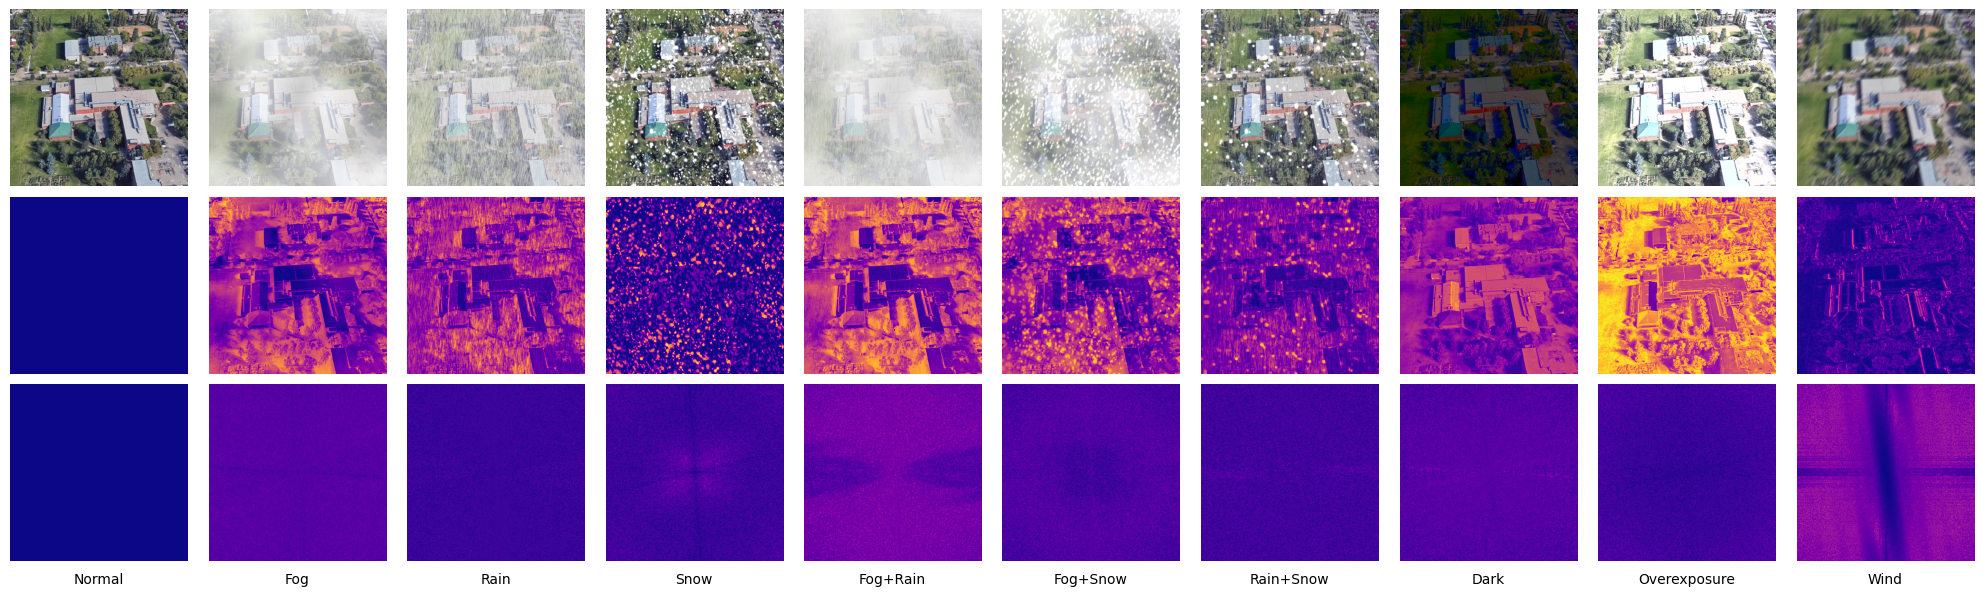

In [58]:
get_figure2()

In [10]:
# figure 3

import numpy as np
from torchvision import transforms
from PIL import Image
import os
import torch
import imgaug as ia


def load(path="University-Release/train/drone/0976/image-54.jpeg", save_file='aug.jpg'):
    t = transforms.ToTensor()
    img = Image.open(path).convert('RGB')   
    img = np.array(img)

    weather = np.random.choice(weathers)
    img_aug = environments[weather](image=img)
    img_aug = Image.fromarray(img_aug)
    save_file=os.path.join('imgs', 'aug_'+weather+path[-8:-5]+'.jpg')
    img_aug.save(save_file)

    #img = t(img)
    # return img
load(path="University-Release/train/drone/0976/image-54.jpeg")
load(path="University-Release/train/drone/0976/image-47.jpeg")
load(path="University-Release/train/drone/0854/image-01.jpeg")
load(path="University-Release/train/drone/0854/image-23.jpeg")